# **<div align="center">Which leaf has a higher proportion of rust?</div>**

Stripe rust is a prevalent disease that affects wheat, impacting global food production. Traditionally, assessing the extent of this disease in crops was done manually, a process both time-consuming and prone to errors. In this project, we use image analysis to automate this assessment. By applying the K-means clustering algorithm to wheat leaf images, we can efficiently segment and quantify rust-infected areas, providing a faster and more accurate method for researchers to gauge rust infection levels.

In [2]:
#Import libraries 

import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.filters import gaussian

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Here, we define the paths to the two rust-infected leaf images. Make sure to adjust these paths.


In [3]:
leaf_path1 = '.../rust1.jpg'
leaf_path2 = '.../rust2.jpg'

Next, we define the `read_leaf_image` function to simplify the process of reading an image and extracting its dimensions. 

In [4]:
def read_leaf_image(path):
    leaf = plt.imread(path)
    (rows,cols,channels)=leaf.shape
    return leaf, rows, cols, channels

In [5]:

leaf1, rows1, cols1, channels1 = read_leaf_image(leaf_path1)
leaf2, rows2, cols2, channels2 = read_leaf_image(leaf_path2)

Let's print the dimensions of both rust-infected leaf images to understand their size and structure.

In [6]:
print("leaf 1 : ", rows1, cols1, channels1)
print("leaf 2 : ", rows2, cols2, channels2)

leaf 1 :  4409 3357 3
leaf 2 :  4300 3073 3


# Initial K-means Clustering: 
In the upcoming section, we will apply the K-means clustering technique to our images. This will help us group similar pixels together, making it easier to distinguish between rusted areas, healthy areas, and the background.

 - We applied the K-means clustering directly to the reshaped images. 

To prepare our images for K-means clustering, we need to reshape them from 3D arrays (rows x columns x channels) into 2D arrays. This is because the K-means algorithm expects data in a 2D format where each row is a data point (in our case, a pixel) with its features (color channels).

In [7]:
img2D_1 = leaf1.reshape(rows1 * cols1, channels1)
img2D_2 = leaf2.reshape(rows2 * cols2, channels2)

print("img2D for leaf 1:\n", img2D_1)
print("img2D for leaf 2:\n", img2D_2)

img2D for leaf 1:
 [[119 117 141]
 [120 118 142]
 [121 119 143]
 ...
 [195 195 223]
 [196 196 224]
 [196 196 224]]
img2D for leaf 2:
 [[186 186 212]
 [187 187 213]
 [189 189 215]
 ...
 [116 116 144]
 [118 118 146]
 [118 118 146]]


 We identify that there are **3** main regions of interest in our images: rusted areas, healthy leaf areas, and the background. Hence, we'll be using K-means clustering with three clusters to segregate these regions.

In [8]:
kmeans_model_1 = KMeans(n_clusters=3,random_state=123) 
kmeans_model_2 = KMeans(n_clusters=3,random_state=123) 

Here, we initialize two K-means clustering models, one for each leaf image. We set the number of clusters to three (rust, leaf, background) and use a fixed random state for reproducibility.

In [9]:
# Fit the k-means model 
cluster_labels_1 = kmeans_model_1.fit_predict(img2D_1)
cluster_labels_2 = kmeans_model_2.fit_predict(img2D_2)

print("leaf 1:\n",cluster_labels_1)
print("leaf 2:\n",cluster_labels_2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


leaf 1:
 [0 0 0 ... 2 2 2]
leaf 2:
 [1 1 1 ... 2 2 2]


Then, we fit our K-means models to the reshaped images. After fitting, we use the models to predict cluster labels for each pixel in both images, which will help us identify which pixels belong to rusted areas, healthy leaf areas, or the background.


In [10]:
# Get the cluster centers
centres_1 = kmeans_model_1.cluster_centers_
centres_2 = kmeans_model_2.cluster_centers_

print("cluster centers for leaf1 :\n", centres_1)
print("cluster centers for leaf1 :\n",centres_2)

cluster centers for leaf1 :
 [[154.60865873 153.69547855 180.57068587]
 [ 63.89840244  69.11045504  32.48444101]
 [182.31157684 183.21093348 213.47092911]]
cluster centers for leaf1 :
 [[ 67.39385243  72.55780625  31.6268377 ]
 [182.13204896 183.28321611 213.3079537 ]
 [152.56811151 152.41257366 178.99562841]]


In [11]:
# Identify the rust, leaf, and background clusters
rust_cluster_1 = np.argmax(centres_1[:, 0] - (centres_1[:, 1] + centres_1[:, 2]))
leaf_cluster_1 = np.argmax(centres_1[:, 1] - (centres_1[:, 0] + centres_1[:, 2]))
background_cluster_1 = 3 - rust_cluster_1 - leaf_cluster_1

rust_cluster_2 = np.argmax(centres_2[:, 0] - (centres_2[:, 1] + centres_2[:, 2]))
leaf_cluster_2 = np.argmax(centres_2[:, 1] - (centres_2[:, 0] + centres_2[:, 2]))
background_cluster_2 = 3 - rust_cluster_2 - leaf_cluster_2

To answer the main question of which leaf has a higher proportion of rust, we calculate the proportion of pixels identified as rust in each image. This proportion gives us a clear metric to compare the extent of rust infection in the two leaves.

In [12]:
# Calculate the proportion of rust pixels in each image
rust_proportion_2 = np.sum(cluster_labels_2 == rust_cluster_2)/ len(cluster_labels_2) * 100
rust_proportion_1 = np.sum(cluster_labels_1 == rust_cluster_1)/ len(cluster_labels_1) * 100

print("Leaf 1 rust proportion: {:.2f}%".format(rust_proportion_1))
print("Leaf 2 rust proportion: {:.2f}%".format(rust_proportion_2))

Leaf 1 rust proportion: 7.60%
Leaf 2 rust proportion: 7.29%


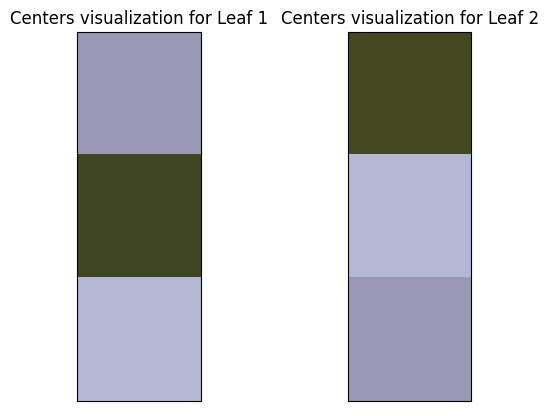

In [13]:
img_viz_1 = centres_1.reshape(3, 1, 3)  # Reshaping the above matrix to have 3 channels ready for imshow
img_viz_2 = centres_2.reshape(3, 1, 3)  # Reshaping the above matrix to have 3 channels ready for imshow

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Display img_viz_1
axes[0].imshow(img_viz_1 / 255)  # Divide by 255 to normalize values
axes[0].set_title("Centers visualization for Leaf 1")

# Display img_viz_2
axes[1].imshow(img_viz_2 / 255)  # Divide by 255 to normalize values
axes[1].set_title("Centers visualization for Leaf 2")

# Remove axis ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


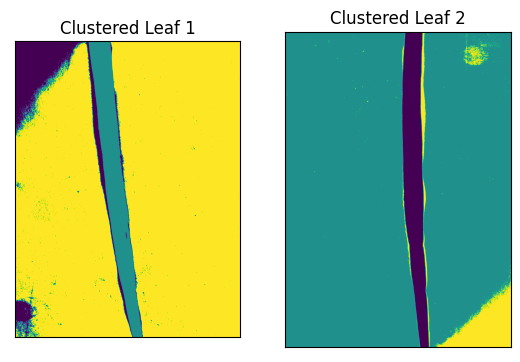

In [14]:
labelled_img_1 = cluster_labels_1.reshape(rows1, cols1)
labelled_img_2 = cluster_labels_2.reshape(rows2, cols2)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Display labelled_img_1
axes[0].imshow(labelled_img_1)
axes[0].set_title("Clustered Leaf 1")

# Display labelled_img_2
axes[1].imshow(labelled_img_2)
axes[1].set_title("Clustered Leaf 2")

# Remove axis ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


This method did not provide satisfactory results, as the clusters did not accurately represent rust, leaf, and background regions.

# K-means Clustering with Color Space Conversion and Image Blurring: 
In this upcoming section, we aim to improve our clustering results by experimenting with two main enhancements:
1. Converting the images to different color spaces, which might provide better color differentiation for clustering.
2. Applying a Gaussian blur to the images to smooth out noise and enhance the color information, making it easier to distinguish between the rust, leaf, and background regions.


We define the `preprocess_image` function. This function applies a Gaussian blur to the input image and then converts the blurred image to a specified color space. Blurring reduces noise, and converting to a different color space might provide better color differentiation for clustering.


In [15]:
def preprocess_image(img, sigma=1, color_space='hsv'):
    # Apply Gaussian blur
    blurred_img = gaussian(img, sigma=sigma)

    # Convert the image to the specified color space
    if color_space == 'hsv':
        converted_img = color.rgb2hsv(blurred_img)
    elif color_space == 'lab':
        converted_img = color.rgb2lab(img)
    else:
        raise ValueError("Invalid color space. Choose either 'hsv' or 'lab'.")

    return converted_img

To streamline our clustering process, we define the `train_kmeans` function. This function reshapes the input image, fits a K-means model, and predicts cluster labels for each pixel. It then reshapes the cluster labels back to the original image dimensions.

In [16]:
def train_kmeans(img, n_clusters=3):
    rows, cols, channels = img.shape

    # Reshape the image to 2D
    img2D = img.reshape(rows * cols, channels)

    # Fit k-means model
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = kmeans_model.fit_predict(img2D)

    # Reshape the cluster labels back to the original image dimensions
    labelled_img = cluster_labels.reshape(rows, cols)

    return labelled_img, kmeans_model



The `plot_clusters` function is defined to help us visualize the clustering results. It displays the original image, the clustered image, and the individual clusters. This visualization provides a clear picture of how the pixels are grouped and assists in understanding the segmentation of rust, leaf, and background regions.


In [17]:
def plot_clusters(img, labelled_img, kmeans_model):
    rows, cols, channels = img.shape

    cluster_centers = kmeans_model.cluster_centers_
    num_clusters = len(cluster_centers)

    # Create a subplot with 1 row and num_clusters + 2 columns
    fig, axes = plt.subplots(1, num_clusters + 2, figsize=(5 * (num_clusters + 2), 5))

    # Display the original image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    
    # Display the clustered image 
    axes[1].imshow(labelled_img)
    axes[1].set_title("Clustered image")

    # Display the clusters
    for i in range(2, num_clusters + 2):
        # Create a mask for the current cluster
        mask = np.zeros((rows, cols), dtype=bool)
        mask[labelled_img == (i - 2)] = True

        # Create a new image with only the current cluster
        cluster_img = np.zeros(img.shape, dtype=img.dtype)
        cluster_img[mask] = img[mask]

        # Display the cluster image
        axes[i].imshow(cluster_img)
        axes[i].set_title(f'Cluster {i-1}')

    for ax in axes.ravel():
        ax.axis('off')
    plt.show()


The `rust_proportion` function calculates the proportion of rust pixels in the image. It counts the number of pixels in the identified rust and leaf clusters and computes the proportion of rust. This metric is essential for comparing the extent of rust infection in different leaves.

In [18]:
def rust_proportion(labelled_img, rust_cluster_index, leaf_cluster_index):
    # Count the number of rust pixels
    rust_pixel_count = np.count_nonzero(labelled_img == rust_cluster_index)

    # Count the number of leaf pixels
    leaf_pixel_count = np.count_nonzero(labelled_img == leaf_cluster_index)

    # Calculate the proportion of rust
    proportion = (rust_pixel_count / (rust_pixel_count + leaf_pixel_count)) * 100

    return proportion

The `compare` function is designed to take the rust proportions for two leaves and determine which one has a higher proportion of rust. After comparing the values, it prints out the rust proportions for both leaves and states which leaf has the higher rust proportion.

In [19]:
def compare(rust_prop1, rust_prop2):
    # Display the rust proportions for each leaf
    print(f"Leaf 1 rust proportion: {rust_prop1:.2f}%")
    print(f"Leaf 2 rust proportion: {rust_prop2:.2f}%")

    # Compare the rust proportions
    if rust_prop1 > rust_prop2:
        print("Leaf 1 has a higher proportion of rust.")
    elif rust_prop1 < rust_prop2:
        print("Leaf 2 has a higher proportion of rust.")
    else:
        print("Both leaves have the same proportion of rust.")

> **1. Lab**

In [20]:
preprocessed_leaf1 = preprocess_image(leaf1, sigma=3, color_space='lab')
preprocessed_leaf2 = preprocess_image(leaf2, sigma=2, color_space='lab')

labelled_leaf1, kmeans_model1 = train_kmeans(preprocessed_leaf1, n_clusters=3)
labelled_leaf2, kmeans_model2 = train_kmeans(preprocessed_leaf2, n_clusters=3)

/tmp/ipykernel_34/2470447974.py:3: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  blurred_img = gaussian(img, sigma=sigma)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


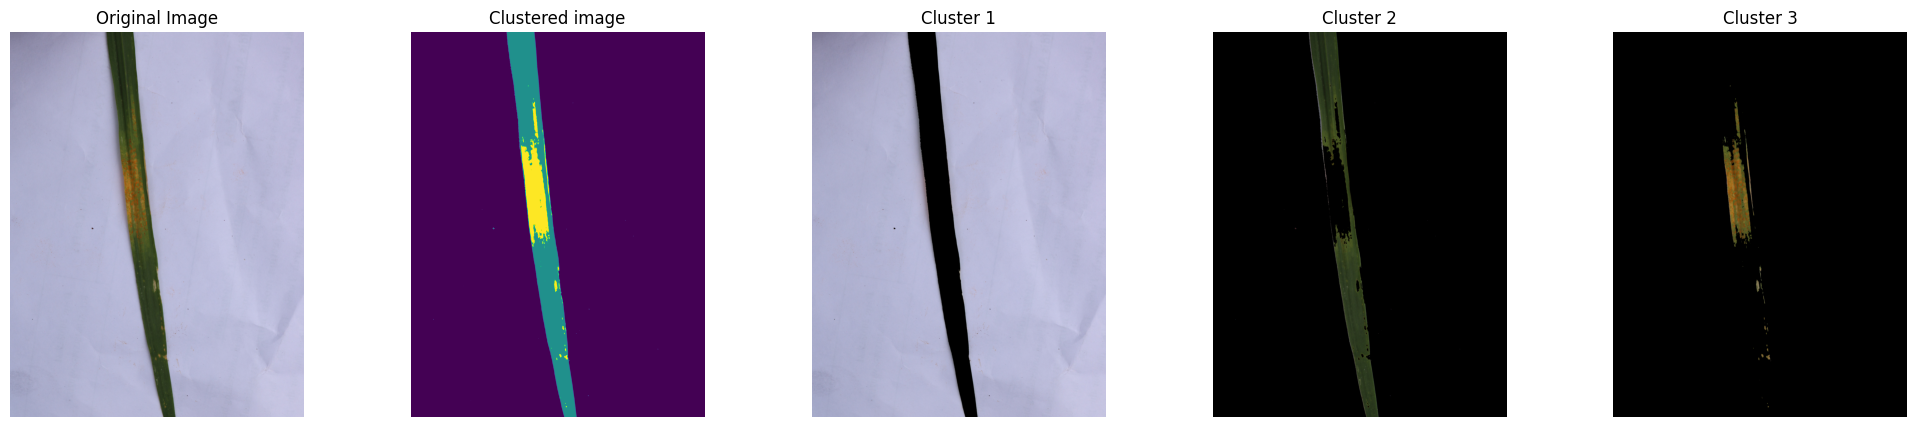

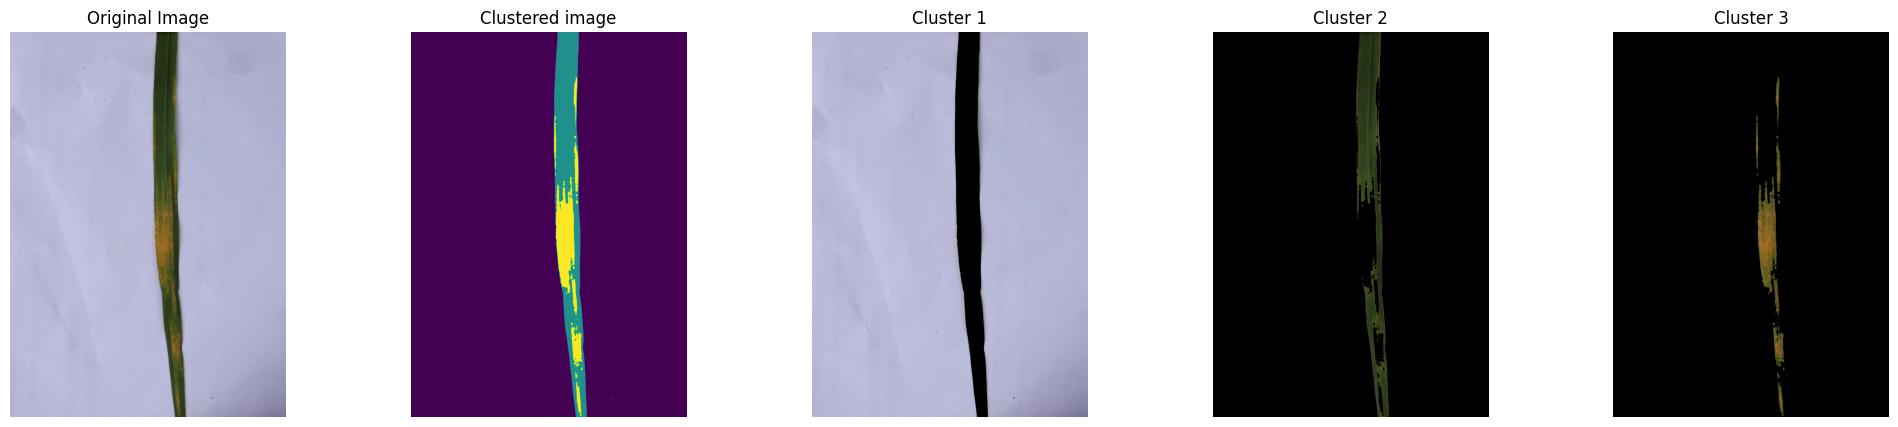

Leaf 1 rust proportion: 22.30%
Leaf 2 rust proportion: 30.24%
Leaf 2 has a higher proportion of rust.


In [21]:
plot_clusters(leaf1, labelled_leaf1, kmeans_model1)
plot_clusters(leaf2, labelled_leaf2, kmeans_model2)

# We identified the index of rust and leaf clusters for each color space based on visualization

# For LAB color space:

# rust_cluster_index = 2
# leaf_cluster_index = 1

rust_prop1 = rust_proportion(labelled_leaf1, 2, 1)
rust_prop2 = rust_proportion(labelled_leaf2, 2, 1)

compare(rust_prop1, rust_prop2)


> **2. Hsv**

In [22]:
preprocessed_leaf1 = preprocess_image(leaf1, sigma=3, color_space='hsv')
preprocessed_leaf2 = preprocess_image(leaf2, sigma=2, color_space='hsv')

labelled_leaf1, kmeans_model1 = train_kmeans(preprocessed_leaf1, n_clusters=3)
labelled_leaf2, kmeans_model2 = train_kmeans(preprocessed_leaf2, n_clusters=3)

/tmp/ipykernel_34/2470447974.py:3: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  blurred_img = gaussian(img, sigma=sigma)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


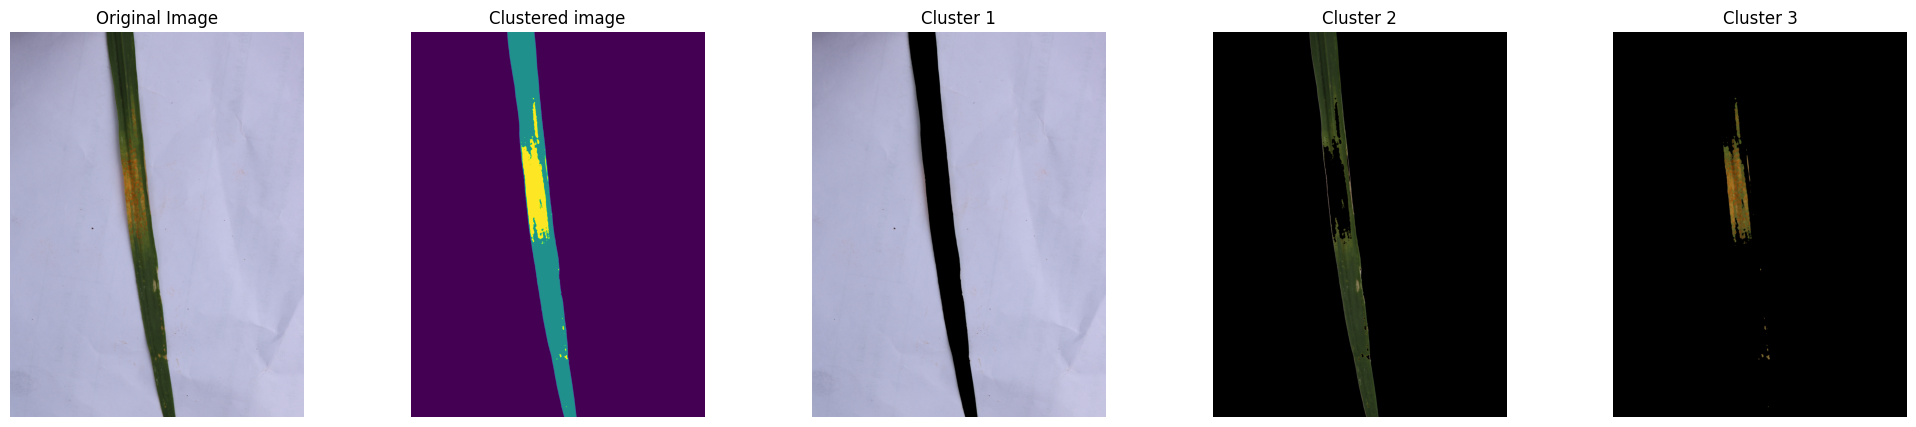

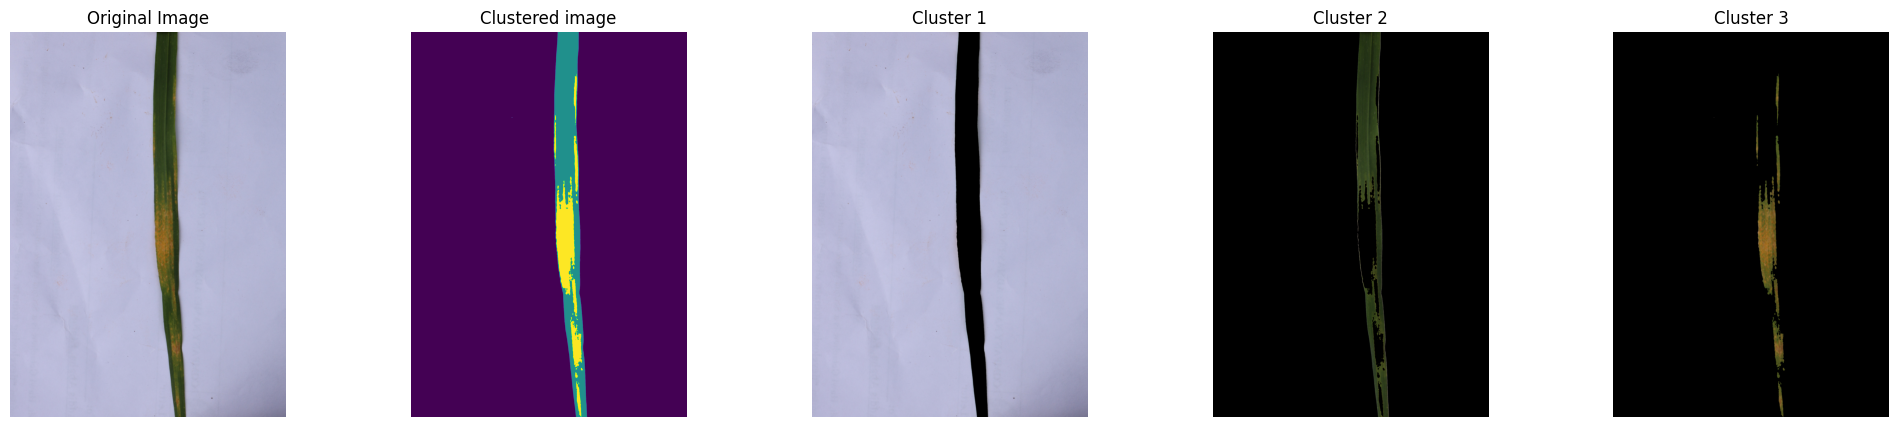

Leaf 1 rust proportion: 20.43%
Leaf 2 rust proportion: 30.45%
Leaf 2 has a higher proportion of rust.


In [23]:
plot_clusters(leaf1, labelled_leaf1, kmeans_model1)
plot_clusters(leaf2, labelled_leaf2, kmeans_model2)

# We identified the index of rust and leaf clusters for each color space based on visualization

# For HSV color space:

# rust_cluster_index = 2
# leaf_cluster_index = 1

rust_prop1 = rust_proportion(labelled_leaf1, 2, 1)
rust_prop2 = rust_proportion(labelled_leaf2, 2, 1)

compare(rust_prop1, rust_prop2)


==> This approach (color conversion & image blurring) resulted in better clustering results compared to the initial attempt, with the rust, leaf, and background regions being more accurately represented.

# Choosing the Best approach: 
based on visual inspection of the clustering results, we found that the K-means clustering model with HSV color space conversion and Gaussian blurring  provided the best results for our task (calculating the proportion of rust in the images).

# Final Result 🕵️‍🍃

To answer the question, we have found the following rust proportions for each leaf:

- Leaf 1 rust proportion: 20.43%
- Leaf 2 rust proportion: 30.45%

**Conclusion:** Leaf 2 has a higher proportion of rust.
